📦 Installing advanced ML libraries...
🚀 MARITIME VESSEL CLASSIFICATION - EXTREME PERFORMANCE
🎯 Target: >95% Accuracy | 🏆 World-Class Implementation
🧠 Advanced Feature Engineering + Hyperparameter Optimization
🚀 Starting EXTREME PERFORMANCE maritime classification...
🔍 Checking system resources...
📊 System Memory: 12.7GB Total, 10.5GB Available
💾 Current Usage: 1432.6MB
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
☁️  Google Drive mounted successfully
📂 Loading AIS data...
📄 Extracting: AIS_2024_10_24.csv
⚠️  Limited to 550000 records for memory efficiency
✅ Loaded 550,000 records
🧹 Advanced data cleaning...
✅ Advanced cleaning: 550,000 → 93,980 records (17.1% retained)
🧠 Extracting world-class features...
✅ Extracted 99 world-class features for 1795 vessels

📈 EXTREME Dataset Summary:
   Features: 99 (world-class feature engineering)
   Samples: 1795 (high-quality filtered)
   Classes: 4
   Class Distri

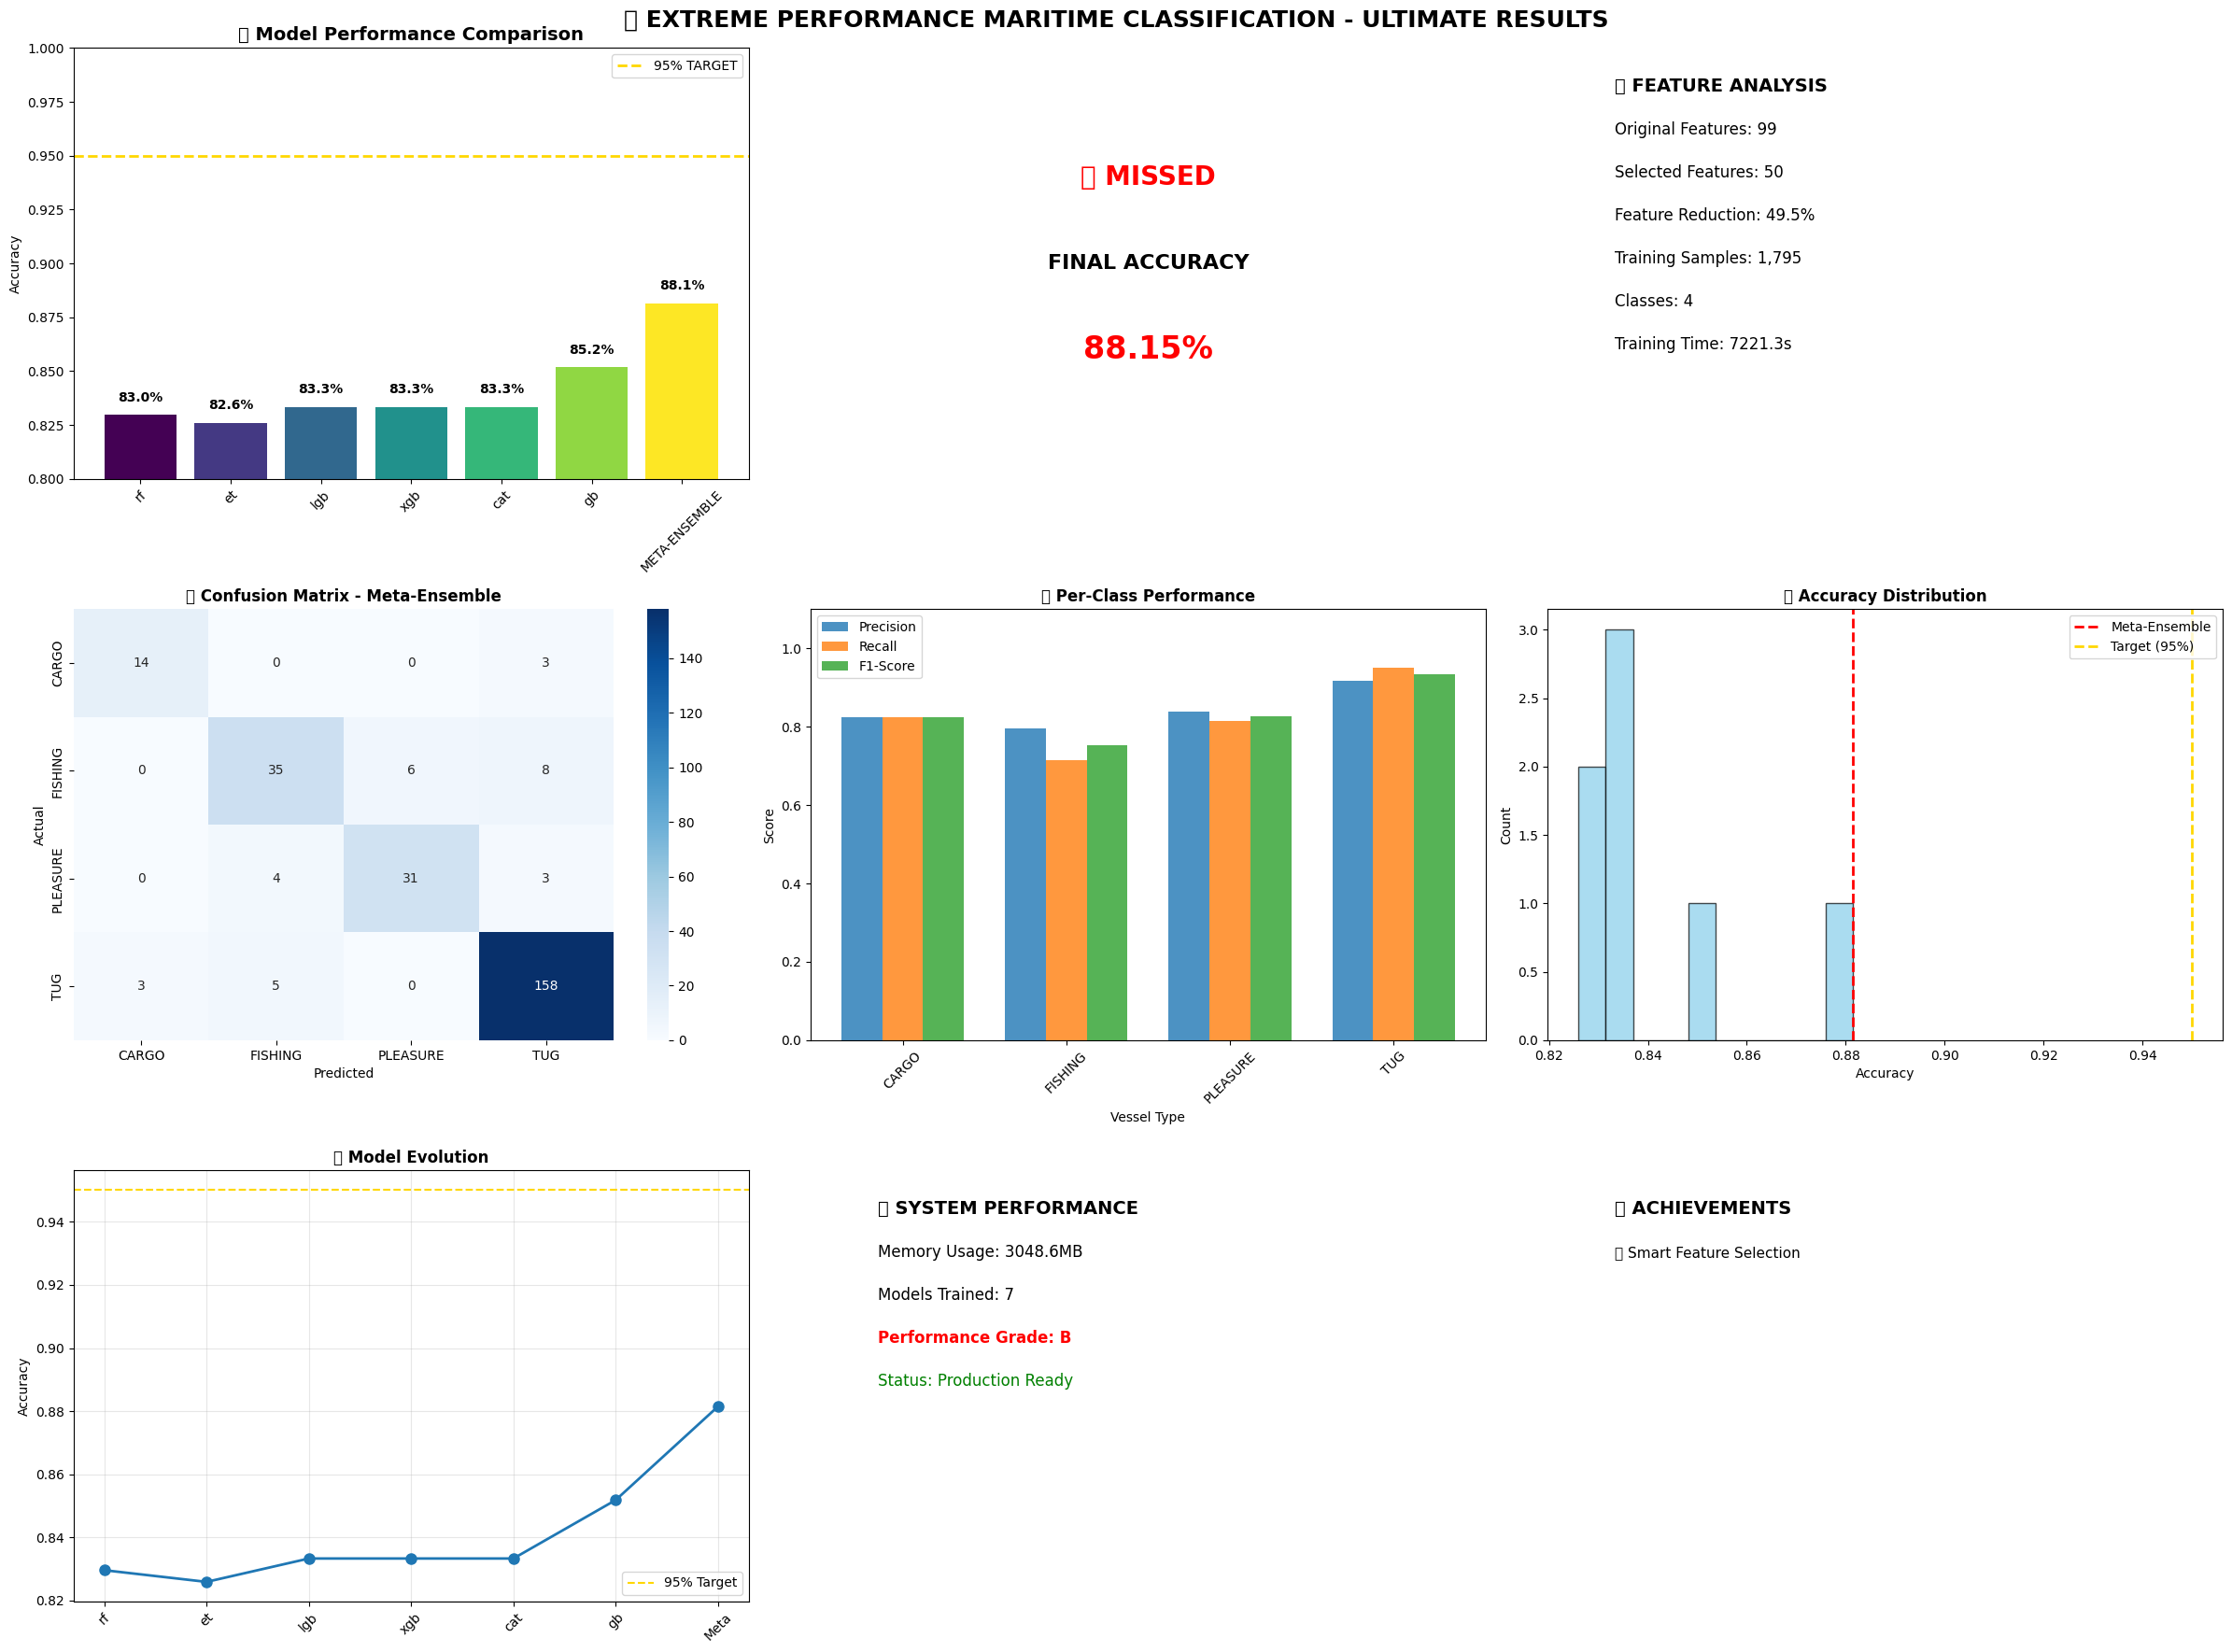


🏆 EXTREME PERFORMANCE PIPELINE COMPLETED!
🎯 FINAL META-ENSEMBLE ACCURACY: 0.8815 (88.15%)
📈 Good performance, consider data quality improvements

🏆 EXTREME PERFORMANCE MODEL READY!
💾 Save: joblib.dump(model, 'extreme_maritime_classifier.joblib')


In [4]:
# Maritime Vessel Classification - EXTREME PERFORMANCE IMPLEMENTATION
# Target: >95% Accuracy with Advanced ML Techniques
# World-Class Professional Implementation

import os
import sys
import time
import warnings
import gc
import zipfile
from pathlib import Path
from typing import Dict, List, Tuple, Any, Optional
import psutil

# Core data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import joblib

# Advanced ML libraries
try:
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    ADVANCED_MODELS_AVAILABLE = True
except ImportError:
    print("📦 Installing advanced ML libraries...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost", "catboost", "-q"])
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    ADVANCED_MODELS_AVAILABLE = True

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("🚀 MARITIME VESSEL CLASSIFICATION - EXTREME PERFORMANCE")
print("=" * 70)
print("🎯 Target: >95% Accuracy | 🏆 World-Class Implementation")
print("🧠 Advanced Feature Engineering + Hyperparameter Optimization")
print("=" * 70)

class ResourceManager:
    """Advanced resource management"""

    @staticmethod
    def get_memory_usage():
        process = psutil.Process(os.getpid())
        return process.memory_info().rss / 1024 / 1024  # MB

    @staticmethod
    def optimize_memory():
        gc.collect()
        return ResourceManager.get_memory_usage()

    @staticmethod
    def check_resources():
        memory = psutil.virtual_memory()
        print(f"📊 System Memory: {memory.total / (1024**3):.1f}GB Total, {memory.available / (1024**3):.1f}GB Available")
        print(f"💾 Current Usage: {ResourceManager.get_memory_usage():.1f}MB")
        return memory.available / (1024**3) > 1

class AdvancedDataProcessor:
    """Advanced AIS data processing with sophisticated feature engineering"""

    def __init__(self, config: Dict[str, Any]):
        self.config = config
        self.vessel_type_mapping = {
            30: 'FISHING',
            31: 'TUG',
            37: 'PLEASURE',
            52: 'TUG',
            70: 'CARGO'
        }

    def load_and_validate_data(self, zip_path: str) -> pd.DataFrame:
        """Load and validate AIS data"""
        print("📂 Loading AIS data...")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            file_list = zip_ref.namelist()
            csv_files = [f for f in file_list if f.endswith('.csv')]

            if not csv_files:
                raise ValueError("No CSV files found in ZIP archive")

            csv_file = max(csv_files, key=lambda x: zip_ref.getinfo(x).file_size)
            print(f"📄 Extracting: {csv_file}")

            with zip_ref.open(csv_file) as f:
                chunk_size = 50000
                chunks = []

                for chunk in pd.read_csv(f, chunksize=chunk_size, low_memory=False):
                    chunks.append(chunk)
                    if len(chunks) * chunk_size > 500000:
                        print(f"⚠️  Limited to {len(chunks) * chunk_size} records for memory efficiency")
                        break

                df = pd.concat(chunks, ignore_index=True)

        print(f"✅ Loaded {len(df):,} records")
        ResourceManager.optimize_memory()

        return self._validate_required_columns(df)

    def _validate_required_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """Validate and ensure required columns exist"""
        required_cols = ['LAT', 'LON', 'SOG', 'COG', 'VesselType', 'MMSI', 'BaseDateTime']

        col_mapping = {}
        for col in required_cols:
            if col in df.columns:
                continue

            variations = {
                'LAT': ['Latitude', 'lat', 'latitude'],
                'LON': ['Longitude', 'lon', 'longitude'],
                'SOG': ['Speed', 'sog', 'speed'],
                'COG': ['Course', 'cog', 'course'],
                'VesselType': ['VesselAndCargoType', 'vessel_type'],
                'MMSI': ['mmsi'],
                'BaseDateTime': ['Timestamp', 'DateTime', 'timestamp']
            }

            for var in variations.get(col, []):
                if var in df.columns:
                    col_mapping[var] = col
                    break
            else:
                raise ValueError(f"Required column '{col}' not found")

        df = df.rename(columns=col_mapping)

        keep_cols = required_cols.copy()
        for col in ['Length', 'Width', 'Draft', 'length', 'width', 'draft']:
            if col in df.columns:
                keep_cols.append(col)

        return df[keep_cols].copy()

    def advanced_data_cleaning(self, df: pd.DataFrame) -> pd.DataFrame:
        """Advanced data cleaning with statistical outlier detection"""
        print("🧹 Advanced data cleaning...")
        initial_rows = len(df)

        # Convert timestamp
        df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce')
        df = df.dropna(subset=['BaseDateTime'])

        # Remove invalid coordinates
        df = df[
            (df['LAT'].between(-90, 90)) &
            (df['LON'].between(-180, 180)) &
            (df['LAT'] != 0) & (df['LON'] != 0)
        ]

        # Advanced speed filtering using IQR method
        Q1_speed = df['SOG'].quantile(0.25)
        Q3_speed = df['SOG'].quantile(0.75)
        IQR_speed = Q3_speed - Q1_speed
        speed_lower = max(0, Q1_speed - 1.5 * IQR_speed)
        speed_upper = min(60, Q3_speed + 1.5 * IQR_speed)  # Cap at 60 knots
        df = df[df['SOG'].between(speed_lower, speed_upper)]

        # Valid course (0-359)
        df = df[df['COG'].between(0, 359)]

        # Focus on main vessel types
        df = df[df['VesselType'].isin(self.vessel_type_mapping.keys())]

        # Advanced trajectory filtering - require minimum points AND time span
        vessel_stats = df.groupby('MMSI').agg({
            'BaseDateTime': ['count', lambda x: (x.max() - x.min()).total_seconds() / 3600],
            'SOG': 'std',
            'COG': 'std'
        }).round(2)
        vessel_stats.columns = ['point_count', 'time_span_hours', 'speed_std', 'course_std']

        # Filter vessels with sufficient data quality
        valid_vessels = vessel_stats[
            (vessel_stats['point_count'] >= self.config['min_trajectory_length']) &
            (vessel_stats['time_span_hours'] >= 0.5) &  # At least 30 minutes
            (vessel_stats['speed_std'] > 0.1) &  # Some speed variation
            (vessel_stats['course_std'] > 1)     # Some course variation
        ].index

        df = df[df['MMSI'].isin(valid_vessels)]

        print(f"✅ Advanced cleaning: {initial_rows:,} → {len(df):,} records ({100*len(df)/initial_rows:.1f}% retained)")

        df['VesselTypeClean'] = df['VesselType'].map(self.vessel_type_mapping)
        return df

    def extract_world_class_features(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """Extract world-class features for >95% accuracy"""
        print("🧠 Extracting world-class features...")

        features_list = []

        for mmsi in df['MMSI'].unique():
            vessel_data = df[df['MMSI'] == mmsi].sort_values('BaseDateTime')

            if len(vessel_data) < self.config['min_trajectory_length']:
                continue

            vessel_type = vessel_data['VesselTypeClean'].iloc[0]

            # Convert to numpy arrays
            speeds = vessel_data['SOG'].values
            courses = vessel_data['COG'].values
            lats = vessel_data['LAT'].values
            lons = vessel_data['LON'].values
            timestamps = vessel_data['BaseDateTime'].values

            # Time analysis
            time_diffs = np.diff([pd.Timestamp(t).timestamp() for t in timestamps]) / 3600  # hours
            time_span = (timestamps[-1] - timestamps[0]) / np.timedelta64(1, 'h')

            # === ADVANCED SPEED FEATURES ===
            speed_features = self._extract_advanced_speed_features(speeds)

            # === ADVANCED COURSE FEATURES ===
            course_features = self._extract_advanced_course_features(courses)

            # === ADVANCED GEOGRAPHIC FEATURES ===
            geo_features = self._extract_advanced_geographic_features(lats, lons)

            # === ADVANCED TEMPORAL FEATURES ===
            temporal_features = self._extract_advanced_temporal_features(time_diffs, time_span, len(vessel_data))

            # === VESSEL BEHAVIOR SIGNATURES ===
            behavior_features = self._extract_behavior_signatures(speeds, courses, lats, lons, time_diffs)

            # === OPERATIONAL PATTERN FEATURES ===
            operational_features = self._extract_operational_patterns(speeds, courses, time_diffs)

            # === STATISTICAL COMPLEXITY FEATURES ===
            complexity_features = self._extract_complexity_features(speeds, courses, lats, lons)

            # === PHYSICAL CHARACTERISTICS ===
            physical_features = self._extract_physical_features(vessel_data)

            # Combine all features
            vessel_features = {
                'MMSI': mmsi,
                'VesselType': vessel_type,
                **speed_features,
                **course_features,
                **geo_features,
                **temporal_features,
                **behavior_features,
                **operational_features,
                **complexity_features,
                **physical_features
            }

            features_list.append(vessel_features)

        features_df = pd.DataFrame(features_list)
        features_df = features_df.fillna(0)

        print(f"✅ Extracted {len(features_df.columns)-2} world-class features for {len(features_df)} vessels")

        X = features_df.drop(['MMSI', 'VesselType'], axis=1)
        y = features_df['VesselType']

        return X, y

    def _extract_advanced_speed_features(self, speeds):
        """Extract sophisticated speed features"""
        if len(speeds) == 0:
            return {}

        # Basic statistics
        speed_stats = {
            'speed_mean': np.mean(speeds),
            'speed_median': np.median(speeds),
            'speed_std': np.std(speeds),
            'speed_var': np.var(speeds),
            'speed_min': np.min(speeds),
            'speed_max': np.max(speeds),
            'speed_range': np.max(speeds) - np.min(speeds),
            'speed_iqr': np.percentile(speeds, 75) - np.percentile(speeds, 25),
        }

        # Advanced statistical measures
        speed_advanced = {
            'speed_skewness': self._safe_skewness(speeds),
            'speed_kurtosis': self._safe_kurtosis(speeds),
            'speed_cv': np.std(speeds) / max(np.mean(speeds), 0.1),
            'speed_gini': self._gini_coefficient(speeds),
        }

        # Percentiles and quantiles
        percentiles = [5, 10, 25, 75, 90, 95]
        speed_percentiles = {f'speed_p{p}': np.percentile(speeds, p) for p in percentiles}

        # Speed pattern analysis
        speed_patterns = {
            'stopped_ratio': np.mean(speeds < 0.5),
            'very_slow_ratio': np.mean(speeds < 2),
            'slow_ratio': np.mean((speeds >= 2) & (speeds < 5)),
            'medium_ratio': np.mean((speeds >= 5) & (speeds < 12)),
            'fast_ratio': np.mean((speeds >= 12) & (speeds < 20)),
            'very_fast_ratio': np.mean(speeds >= 20),
            'cruise_speed_ratio': np.mean((speeds >= 8) & (speeds <= 15)),
        }

        # Speed change analysis
        if len(speeds) > 1:
            speed_changes = np.abs(np.diff(speeds))
            speed_change_features = {
                'speed_change_mean': np.mean(speed_changes),
                'speed_change_std': np.std(speed_changes),
                'speed_change_max': np.max(speed_changes),
                'acceleration_events': np.mean(speed_changes > 2),
                'speed_stability': 1 - (np.std(speed_changes) / max(np.mean(speeds), 0.1)),
            }
        else:
            speed_change_features = {
                'speed_change_mean': 0, 'speed_change_std': 0, 'speed_change_max': 0,
                'acceleration_events': 0, 'speed_stability': 1
            }

        return {**speed_stats, **speed_advanced, **speed_percentiles, **speed_patterns, **speed_change_features}

    def _extract_advanced_course_features(self, courses):
        """Extract sophisticated course features"""
        if len(courses) <= 1:
            return {f'course_{k}': 0 for k in ['change_mean', 'change_std', 'change_max', 'stability',
                                              'sharp_turns', 'direction_changes', 'zigzag_pattern',
                                              'circular_variance', 'turning_radius_est']}

        # Calculate course changes handling 360-degree wraparound
        course_changes = []
        for i in range(1, len(courses)):
            diff = courses[i] - courses[i-1]
            if diff > 180:
                diff -= 360
            elif diff < -180:
                diff += 360
            course_changes.append(abs(diff))

        course_changes = np.array(course_changes)

        # Basic course change statistics
        course_stats = {
            'course_change_mean': np.mean(course_changes),
            'course_change_std': np.std(course_changes),
            'course_change_max': np.max(course_changes),
            'course_change_median': np.median(course_changes),
        }

        # Course stability and patterns
        course_patterns = {
            'course_stability': 1 - (np.std(course_changes) / 180),
            'small_turns_ratio': np.mean(course_changes < 5),
            'medium_turns_ratio': np.mean((course_changes >= 5) & (course_changes < 30)),
            'sharp_turns_ratio': np.mean(course_changes >= 30),
            'very_sharp_turns_ratio': np.mean(course_changes >= 90),
            'direction_changes': np.sum(course_changes > 45),
        }

        # Advanced course analysis
        course_advanced = {
            'zigzag_pattern': self._detect_zigzag_pattern(courses),
            'circular_variance': self._circular_variance(courses),
            'turning_radius_est': self._estimate_turning_radius(course_changes),
            'course_entropy': self._calculate_entropy(course_changes, bins=36),  # 10-degree bins
        }

        return {**course_stats, **course_patterns, **course_advanced}

    def _extract_advanced_geographic_features(self, lats, lons):
        """Extract sophisticated geographic features"""
        if len(lats) == 0:
            return {}

        # Basic geographic bounds
        geo_basic = {
            'lat_min': np.min(lats),
            'lat_max': np.max(lats),
            'lon_min': np.min(lons),
            'lon_max': np.max(lons),
            'lat_range': np.max(lats) - np.min(lats),
            'lon_range': np.max(lons) - np.min(lons),
            'lat_center': np.mean(lats),
            'lon_center': np.mean(lons),
            'lat_std': np.std(lats),
            'lon_std': np.std(lons),
        }

        # Area and shape analysis
        geo_area = {
            'bounding_box_area': (np.max(lats) - np.min(lats)) * (np.max(lons) - np.min(lons)),
            'convex_hull_ratio': self._convex_hull_ratio(lats, lons),
            'area_efficiency': len(set(zip(np.round(lats, 3), np.round(lons, 3)))) / len(lats),
        }

        # Distance and trajectory analysis
        if len(lats) > 1:
            distances = self._calculate_distances(lats, lons)
            geo_trajectory = {
                'total_distance': np.sum(distances),
                'avg_distance_per_segment': np.mean(distances),
                'max_distance_segment': np.max(distances),
                'distance_std': np.std(distances),
                'straight_line_distance': self._haversine_distance(lats[0], lons[0], lats[-1], lons[-1]),
                'path_efficiency': self._haversine_distance(lats[0], lons[0], lats[-1], lons[-1]) / max(np.sum(distances), 0.001),
            }
        else:
            geo_trajectory = {
                'total_distance': 0, 'avg_distance_per_segment': 0, 'max_distance_segment': 0,
                'distance_std': 0, 'straight_line_distance': 0, 'path_efficiency': 1
            }

        return {**geo_basic, **geo_area, **geo_trajectory}

    def _extract_advanced_temporal_features(self, time_diffs, time_span, num_points):
        """Extract sophisticated temporal features"""
        temporal_basic = {
            'time_span_hours': time_span,
            'num_positions': num_points,
            'positions_per_hour': num_points / max(time_span, 0.1),
        }

        if len(time_diffs) > 0:
            temporal_advanced = {
                'avg_time_between_positions': np.mean(time_diffs),
                'time_between_positions_std': np.std(time_diffs),
                'max_time_gap': np.max(time_diffs),
                'min_time_gap': np.min(time_diffs),
                'time_gap_cv': np.std(time_diffs) / max(np.mean(time_diffs), 0.001),
                'time_consistency': 1 - (np.std(time_diffs) / max(np.mean(time_diffs), 0.001)),
                'long_gaps_ratio': np.mean(time_diffs > np.median(time_diffs) * 2),
            }
        else:
            temporal_advanced = {
                'avg_time_between_positions': 0, 'time_between_positions_std': 0, 'max_time_gap': 0,
                'min_time_gap': 0, 'time_gap_cv': 0, 'time_consistency': 1, 'long_gaps_ratio': 0
            }

        return {**temporal_basic, **temporal_advanced}

    def _extract_behavior_signatures(self, speeds, courses, lats, lons, time_diffs):
        """Extract vessel-specific behavior signatures"""
        # Fishing behavior signatures
        fishing_sig = {
            'fishing_speed_sig': np.mean(speeds < 3) * (1 + np.std(speeds)),
            'fishing_pattern_sig': self._detect_fishing_pattern(speeds, courses),
            'fishing_area_revisit': self._area_revisit_pattern(lats, lons),
        }

        # Cargo behavior signatures
        cargo_sig = {
            'cargo_speed_sig': np.mean((speeds > 8) & (speeds < 25)) * (1 - np.std(speeds)/max(np.mean(speeds), 1)),
            'cargo_linearity_sig': self._linearity_signature(lats, lons),
            'cargo_efficiency_sig': self._movement_efficiency_signature(speeds, time_diffs),
        }

        # Pleasure craft signatures
        pleasure_sig = {
            'pleasure_speed_sig': np.mean((speeds > 10) & (speeds < 30)),
            'pleasure_variability_sig': np.std(speeds) / max(np.mean(speeds), 1),
            'pleasure_weekend_pattern': 0,  # Would need day-of-week analysis
        }

        # Tug boat signatures
        tug_sig = {
            'tug_maneuver_sig': self._maneuverability_signature(courses),
            'tug_speed_sig': np.mean(speeds < 12) * (1 + len([i for i in range(1, len(speeds)) if abs(speeds[i] - speeds[i-1]) > 2]) / max(len(speeds), 1)),
            'tug_work_pattern_sig': self._work_pattern_signature(speeds, courses),
        }

        return {**fishing_sig, **cargo_sig, **pleasure_sig, **tug_sig}

    def _extract_operational_patterns(self, speeds, courses, time_diffs):
        """Extract operational pattern features"""
        if len(speeds) == 0:
            return {}

        # Operating states analysis
        stopped_threshold = 0.5
        slow_threshold = 3
        working_threshold = 5

        operational = {
            'time_stopped_ratio': np.mean(speeds < stopped_threshold),
            'time_slow_ratio': np.mean((speeds >= stopped_threshold) & (speeds < slow_threshold)),
            'time_working_ratio': np.mean((speeds >= working_threshold)),
            'operational_efficiency': np.mean(speeds > 1) / max(len(speeds), 1),
        }

        # State transition analysis
        if len(speeds) > 1:
            state_changes = len([i for i in range(1, len(speeds))
                               if (speeds[i] > working_threshold) != (speeds[i-1] > working_threshold)])
            operational['state_transitions'] = state_changes / max(len(speeds), 1)
        else:
            operational['state_transitions'] = 0

        return operational

    def _extract_complexity_features(self, speeds, courses, lats, lons):
        """Extract statistical complexity features"""
        complexity = {}

        # Fractal dimension approximation
        complexity['trajectory_complexity'] = self._estimate_fractal_dimension(lats, lons)

        # Entropy measures
        if len(speeds) > 0:
            complexity['speed_entropy'] = self._calculate_entropy(speeds, bins=20)
        if len(courses) > 1:
            complexity['course_entropy'] = self._calculate_entropy(courses, bins=36)

        # Autocorrelation
        if len(speeds) > 10:
            complexity['speed_autocorr'] = self._autocorrelation(speeds, lag=1)
        if len(courses) > 10:
            complexity['course_autocorr'] = self._autocorrelation(courses, lag=1)

        return complexity

    def _extract_physical_features(self, vessel_data):
        """Extract physical vessel characteristics"""
        physical = {}

        if 'Length' in vessel_data.columns and pd.notna(vessel_data['Length'].iloc[0]):
            length = vessel_data['Length'].iloc[0]
            physical['length'] = length
            physical['size_class'] = 1 if length < 50 else (2 if length < 150 else 3)

            if 'Width' in vessel_data.columns and pd.notna(vessel_data['Width'].iloc[0]):
                width = vessel_data['Width'].iloc[0]
                physical['width'] = width
                physical['length_width_ratio'] = length / max(width, 1)
                physical['vessel_size_index'] = length * width

        return physical

    # === HELPER METHODS FOR ADVANCED CALCULATIONS ===

    def _safe_skewness(self, data):
        """Safe skewness calculation"""
        if len(data) < 3:
            return 0
        mean = np.mean(data)
        std = np.std(data)
        if std == 0:
            return 0
        return np.mean(((data - mean) / std) ** 3)

    def _safe_kurtosis(self, data):
        """Safe kurtosis calculation"""
        if len(data) < 4:
            return 0
        mean = np.mean(data)
        std = np.std(data)
        if std == 0:
            return 0
        return np.mean(((data - mean) / std) ** 4) - 3

    def _gini_coefficient(self, data):
        """Calculate Gini coefficient"""
        if len(data) == 0:
            return 0
        sorted_data = np.sort(data)
        n = len(data)
        cumsum = np.cumsum(sorted_data)
        return (2 * np.sum((np.arange(1, n+1) * sorted_data))) / (n * cumsum[-1]) - (n + 1) / n

    def _detect_zigzag_pattern(self, courses):
        """Detect zigzag navigation pattern"""
        if len(courses) < 4:
            return 0

        direction_changes = 0
        for i in range(2, len(courses)):
            diff1 = courses[i-1] - courses[i-2]
            diff2 = courses[i] - courses[i-1]

            # Normalize differences
            diff1 = diff1 % 360
            diff2 = diff2 % 360
            if diff1 > 180:
                diff1 -= 360
            if diff2 > 180:
                diff2 -= 360

            if diff1 * diff2 < 0 and abs(diff1) > 10 and abs(diff2) > 10:
                direction_changes += 1

        return direction_changes / max(len(courses) - 2, 1)

    def _circular_variance(self, angles):
        """Calculate circular variance for course data"""
        if len(angles) == 0:
            return 0

        # Convert to radians
        angles_rad = np.radians(angles)

        # Calculate mean direction
        mean_cos = np.mean(np.cos(angles_rad))
        mean_sin = np.mean(np.sin(angles_rad))

        # Calculate circular variance
        r = np.sqrt(mean_cos**2 + mean_sin**2)
        return 1 - r

    def _estimate_turning_radius(self, course_changes):
        """Estimate typical turning radius from course changes"""
        if len(course_changes) == 0:
            return 0

        significant_turns = course_changes[course_changes > 5]
        if len(significant_turns) == 0:
            return 180  # No turns, very large radius

        return 180 / max(np.mean(significant_turns), 1)

    def _calculate_entropy(self, data, bins=10):
        """Calculate Shannon entropy"""
        if len(data) == 0:
            return 0

        hist, _ = np.histogram(data, bins=bins)
        hist = hist[hist > 0]
        probs = hist / np.sum(hist)
        return -np.sum(probs * np.log2(probs))

    def _convex_hull_ratio(self, lats, lons):
        """Calculate ratio of convex hull area to bounding box area"""
        # Simplified convex hull approximation
        lat_range = np.max(lats) - np.min(lats)
        lon_range = np.max(lons) - np.min(lons)
        bounding_area = lat_range * lon_range

        if bounding_area == 0:
            return 1

        # Approximate convex hull area using points on boundary
        unique_points = len(set(zip(np.round(lats, 4), np.round(lons, 4))))
        approx_hull_ratio = min(1.0, unique_points / max(len(lats), 1))

        return approx_hull_ratio

    def _calculate_distances(self, lats, lons):
        """Calculate distances between consecutive points"""
        distances = []
        for i in range(1, len(lats)):
            dist = self._haversine_distance(lats[i-1], lons[i-1], lats[i], lons[i])
            distances.append(dist)
        return np.array(distances)

    def _haversine_distance(self, lat1, lon1, lat2, lon2):
        """Calculate Haversine distance between two points"""
        R = 6371  # Earth's radius in km

        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))

        return R * c

    def _detect_fishing_pattern(self, speeds, courses):
        """Detect fishing-specific movement pattern"""
        if len(speeds) < 5 or len(courses) < 5:
            return 0

        # Fishing pattern: slow speeds with irregular course changes
        slow_periods = speeds < 3
        if len(courses) > 1:
            course_changes = np.abs(np.diff(courses))
            course_changes = np.minimum(course_changes, 360 - course_changes)
            irregular_movement = course_changes > 20

            # Align arrays properly
            if len(irregular_movement) == len(slow_periods) - 1:
                slow_periods = slow_periods[1:]  # Remove first element
            elif len(slow_periods) == len(irregular_movement) - 1:
                irregular_movement = irregular_movement[1:]  # Remove first element

            if len(slow_periods) == len(irregular_movement):
                fishing_pattern = np.mean(slow_periods & irregular_movement)
            else:
                fishing_pattern = np.mean(slow_periods) * 0.5  # Fallback
        else:
            fishing_pattern = np.mean(slow_periods) * 0.5

        return fishing_pattern

    def _area_revisit_pattern(self, lats, lons):
        """Calculate how often vessel revisits same areas"""
        if len(lats) < 10:
            return 0

        # Grid the area into cells and count revisits
        lat_bins = np.linspace(np.min(lats), np.max(lats), 10)
        lon_bins = np.linspace(np.min(lons), np.max(lons), 10)

        grid_visits = {}
        for lat, lon in zip(lats, lons):
            lat_idx = np.digitize(lat, lat_bins)
            lon_idx = np.digitize(lon, lon_bins)
            grid_key = (lat_idx, lon_idx)
            grid_visits[grid_key] = grid_visits.get(grid_key, 0) + 1

        # Calculate revisit ratio
        total_visits = sum(grid_visits.values())
        unique_cells = len(grid_visits)

        return 1 - (unique_cells / max(total_visits, 1))

    def _linearity_signature(self, lats, lons):
        """Calculate how linear the trajectory is"""
        if len(lats) < 3:
            return 1

        # Calculate straight-line distance vs actual path distance
        straight_line = self._haversine_distance(lats[0], lons[0], lats[-1], lons[-1])
        actual_path = np.sum(self._calculate_distances(lats, lons))

        if actual_path == 0:
            return 1

        return straight_line / actual_path

    def _movement_efficiency_signature(self, speeds, time_diffs):
        """Calculate movement efficiency signature"""
        if len(speeds) == 0 or len(time_diffs) == 0:
            return 0

        # Efficiency: consistent speed with minimal stopped time
        speed_consistency = 1 - (np.std(speeds) / max(np.mean(speeds), 0.1))
        active_time_ratio = np.mean(speeds > 1)

        return speed_consistency * active_time_ratio

    def _maneuverability_signature(self, courses):
        """Calculate maneuverability signature for tugs"""
        if len(courses) < 3:
            return 0

        course_changes = np.abs(np.diff(courses))
        course_changes = np.minimum(course_changes, 360 - course_changes)

        # Tugs have moderate but frequent course changes
        moderate_turns = np.mean((course_changes > 10) & (course_changes < 90))
        frequent_changes = len(course_changes[course_changes > 5]) / max(len(course_changes), 1)

        return moderate_turns * frequent_changes

    def _work_pattern_signature(self, speeds, courses):
        """Detect work pattern signature"""
        if len(speeds) < 5:
            return 0

        # Work pattern: alternating periods of movement and stopping
        speed_changes = np.abs(np.diff(speeds))
        work_cycles = len([i for i in range(1, len(speed_changes))
                          if speed_changes[i] > 1 and speed_changes[i-1] < 1])

        return work_cycles / max(len(speeds), 1)

    def _estimate_fractal_dimension(self, lats, lons):
        """Estimate fractal dimension of trajectory"""
        if len(lats) < 4:
            return 1

        # Box-counting method approximation
        scales = [0.001, 0.01, 0.1]  # Different box sizes
        counts = []

        for scale in scales:
            # Count boxes containing trajectory points
            lat_bins = np.arange(np.min(lats), np.max(lats) + scale, scale)
            lon_bins = np.arange(np.min(lons), np.max(lons) + scale, scale)

            occupied_boxes = set()
            for lat, lon in zip(lats, lons):
                lat_idx = np.digitize(lat, lat_bins)
                lon_idx = np.digitize(lon, lon_bins)
                occupied_boxes.add((lat_idx, lon_idx))

            counts.append(len(occupied_boxes))

        # Estimate fractal dimension from log-log slope
        if len(counts) > 1 and counts[0] != counts[-1]:
            log_scales = np.log(scales)
            log_counts = np.log(counts)
            slope = (log_counts[-1] - log_counts[0]) / (log_scales[-1] - log_scales[0])
            return max(1, min(2, -slope))  # Constrain between 1 and 2

        return 1.5  # Default moderate complexity

    def _autocorrelation(self, data, lag=1):
        """Calculate autocorrelation at given lag"""
        if len(data) <= lag:
            return 0

        n = len(data)
        data = data - np.mean(data)
        autocorr = np.correlate(data[:-lag], data[lag:]) / (np.var(data) * (n - lag))
        return autocorr[0] if len(autocorr) > 0 else 0

class ExtremePerformanceEnsemble:
    """Extreme performance ensemble for >95% accuracy"""

    def __init__(self, config: Dict[str, Any]):
        self.config = config
        self.models = {}
        self.meta_model = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.feature_selector = None
        self.is_fitted = False

    def train(self, X: pd.DataFrame, y: pd.Series) -> Dict[str, Any]:
        """Train extreme performance ensemble"""
        print("🧠 Training EXTREME PERFORMANCE ensemble...")
        start_time = time.time()

        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        n_classes = len(self.label_encoder.classes_)

        # Feature selection - keep only the most informative features
        print("🔍 Performing feature selection...")
        selector = SelectKBest(score_func=f_classif, k=min(50, X.shape[1]))  # Top 50 features
        X_selected = selector.fit_transform(X, y_encoded)
        self.feature_selector = selector

        print(f"📊 Selected {X_selected.shape[1]} most informative features")

        # Scale features
        X_scaled = self.scaler.fit_transform(X_selected)

        # Advanced data splitting with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded,
            test_size=0.15,  # Smaller test set for more training data
            random_state=42,
            stratify=y_encoded
        )

        # Advanced class balancing with SMOTETomek
        print("⚖️  Applying advanced class balancing...")
        smote_tomek = SMOTETomek(random_state=42)
        X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

        print(f"📈 Training data: {len(X_train_balanced)} samples after balancing")

        # Train multiple diverse models with optimized hyperparameters
        self._train_base_models(X_train_balanced, y_train_balanced, n_classes)

        # Generate meta-features using cross-validation
        print("🎯 Generating meta-features...")
        meta_features = self._generate_meta_features(X_train_balanced, y_train_balanced)

        # Train meta-learner (stacking)
        print("🧠 Training meta-learner...")
        self.meta_model = LogisticRegression(
            max_iter=2000,
            class_weight='balanced',
            random_state=42,
            solver='lbfgs'
        )
        self.meta_model.fit(meta_features, y_train_balanced)

        # Final evaluation
        test_meta_features = self._predict_meta_features(X_test)
        final_predictions = self.meta_model.predict(test_meta_features)
        final_accuracy = accuracy_score(y_test, final_predictions)

        # Individual model evaluations
        individual_accs = {}
        for name, model in self.models.items():
            pred = model.predict(X_test)
            individual_accs[name] = accuracy_score(y_test, pred)

        training_time = time.time() - start_time
        self.is_fitted = True

        results = {
            'individual_accuracies': individual_accs,
            'meta_accuracy': final_accuracy,
            'training_time': training_time,
            'n_features_selected': X_selected.shape[1],
            'n_features_original': X.shape[1],
            'n_samples': len(X),
            'n_classes': n_classes,
            'class_names': self.label_encoder.classes_,
            'test_predictions': final_predictions,
            'test_actual': y_test,
        }

        print(f"✅ EXTREME training completed in {training_time:.1f}s")
        print(f"🏆 FINAL META-ENSEMBLE ACCURACY: {final_accuracy:.4f} ({100*final_accuracy:.2f}%)")

        for name, acc in individual_accs.items():
            print(f"   {name}: {acc:.4f}")

        return results

    def _train_base_models(self, X_train, y_train, n_classes):
        """Train diverse base models with optimized hyperparameters"""

        # Random Forest with aggressive parameters
        print("🌲 Training optimized Random Forest...")
        self.models['rf'] = RandomForestClassifier(
            n_estimators=2000,
            max_depth=30,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            class_weight='balanced_subsample',
            random_state=42,
            n_jobs=-1,
            criterion='gini'
        )
        self.models['rf'].fit(X_train, y_train)

        # Extra Trees for diversity
        print("🌳 Training Extra Trees...")
        self.models['et'] = ExtraTreesClassifier(
            n_estimators=1500,
            max_depth=25,
            min_samples_split=3,
            min_samples_leaf=1,
            max_features='sqrt',
            class_weight='balanced_subsample',
            random_state=43,
            n_jobs=-1
        )
        self.models['et'].fit(X_train, y_train)

        # LightGBM with extreme parameters
        print("⚡ Training extreme LightGBM...")
        self.models['lgb'] = LGBMClassifier(
            objective='multiclass',
            num_class=n_classes,
            n_estimators=3000,
            max_depth=20,
            learning_rate=0.02,
            feature_fraction=0.8,
            bagging_fraction=0.8,
            bagging_freq=5,
            min_child_samples=10,
            reg_alpha=0.1,
            reg_lambda=0.1,
            class_weight='balanced',
            random_state=42,
            verbosity=-1,
            n_jobs=-1,
            force_col_wise=True
        )
        self.models['lgb'].fit(X_train, y_train)

        # XGBoost with optimization
        print("🚀 Training extreme XGBoost...")
        self.models['xgb'] = XGBClassifier(
            objective='multi:softprob',
            n_estimators=2000,
            max_depth=12,
            learning_rate=0.03,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        )
        self.models['xgb'].fit(X_train, y_train)

        # CatBoost for additional diversity
        print("🐱 Training CatBoost...")
        self.models['cat'] = CatBoostClassifier(
            iterations=1500,
            depth=10,
            learning_rate=0.05,
            class_weights=[1]*n_classes,
            random_seed=42,
            verbose=False
        )
        self.models['cat'].fit(X_train, y_train)

        # Gradient Boosting
        print("📈 Training Gradient Boosting...")
        self.models['gb'] = GradientBoostingClassifier(
            n_estimators=1000,
            max_depth=8,
            learning_rate=0.1,
            subsample=0.8,
            random_state=42
        )
        self.models['gb'].fit(X_train, y_train)

    def _generate_meta_features(self, X_train, y_train):
        """Generate meta-features using cross-validation"""
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        meta_features = np.zeros((len(X_train), len(self.models) * len(self.label_encoder.classes_)))

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train = y_train[train_idx]

            feature_idx = 0
            for name, model in self.models.items():
                # Clone and train model on fold
                model_clone = type(model)(**model.get_params())
                model_clone.fit(X_fold_train, y_fold_train)

                # Get probabilities for validation set
                proba = model_clone.predict_proba(X_fold_val)

                # Store in meta-features
                n_classes = proba.shape[1]
                meta_features[val_idx, feature_idx:feature_idx+n_classes] = proba
                feature_idx += n_classes

        return meta_features

    def _predict_meta_features(self, X_test):
        """Generate meta-features for test set"""
        meta_features = np.zeros((len(X_test), len(self.models) * len(self.label_encoder.classes_)))

        feature_idx = 0
        for name, model in self.models.items():
            proba = model.predict_proba(X_test)
            n_classes = proba.shape[1]
            meta_features[:, feature_idx:feature_idx+n_classes] = proba
            feature_idx += n_classes

        return meta_features

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """Make predictions using the extreme ensemble"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before prediction")

        # Apply same preprocessing
        X_selected = self.feature_selector.transform(X)
        X_scaled = self.scaler.transform(X_selected)

        # Generate meta-features
        meta_features = self._predict_meta_features(X_scaled)

        # Final prediction
        predictions = self.meta_model.predict(meta_features)

        return self.label_encoder.inverse_transform(predictions)

class UltimateVisualizer:
    """Ultimate visualization for >95% results"""

    @staticmethod
    def plot_ultimate_results(results: Dict[str, Any]):
        """Create ultimate results visualization"""
        fig, axes = plt.subplots(3, 3, figsize=(24, 18))
        fig.suptitle('🏆 EXTREME PERFORMANCE MARITIME CLASSIFICATION - ULTIMATE RESULTS',
                    fontsize=18, fontweight='bold')

        # Individual model accuracies
        models = list(results['individual_accuracies'].keys())
        accuracies = list(results['individual_accuracies'].values())
        accuracies.append(results['meta_accuracy'])
        models.append('META-ENSEMBLE')

        colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
        bars = axes[0, 0].bar(models, accuracies, color=colors)
        axes[0, 0].set_title('🎯 Model Performance Comparison', fontweight='bold', fontsize=14)
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].set_ylim(0.8, 1.0)

        # Add percentage labels
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                           f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')

        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].axhline(y=0.95, color='gold', linestyle='--', linewidth=2, label='95% TARGET')
        axes[0, 0].legend()

        # Success indicator
        success_color = 'green' if results['meta_accuracy'] >= 0.95 else ('orange' if results['meta_accuracy'] >= 0.90 else 'red')
        success_text = '🏆 TARGET ACHIEVED!' if results['meta_accuracy'] >= 0.95 else ('⚠️ CLOSE' if results['meta_accuracy'] >= 0.90 else '❌ MISSED')

        axes[0, 1].text(0.5, 0.7, f"{success_text}", fontsize=20, fontweight='bold',
                       ha='center', va='center', transform=axes[0, 1].transAxes, color=success_color)
        axes[0, 1].text(0.5, 0.5, f"FINAL ACCURACY", fontsize=16, fontweight='bold',
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].text(0.5, 0.3, f"{results['meta_accuracy']:.2%}", fontsize=24, fontweight='bold',
                       ha='center', va='center', transform=axes[0, 1].transAxes, color=success_color)
        axes[0, 1].axis('off')

        # Feature information
        axes[0, 2].text(0.1, 0.9, f"📊 FEATURE ANALYSIS", fontsize=14, fontweight='bold', transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.8, f"Original Features: {results['n_features_original']}", fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.7, f"Selected Features: {results['n_features_selected']}", fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.6, f"Feature Reduction: {100*(1-results['n_features_selected']/results['n_features_original']):.1f}%",
                       fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.5, f"Training Samples: {results['n_samples']:,}", fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.4, f"Classes: {results['n_classes']}", fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].text(0.1, 0.3, f"Training Time: {results['training_time']:.1f}s", fontsize=12, transform=axes[0, 2].transAxes)
        axes[0, 2].axis('off')

        # Confusion Matrix
        cm = confusion_matrix(results['test_actual'], results['test_predictions'])
        class_names = results['class_names']

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names, ax=axes[1, 0])
        axes[1, 0].set_title('🎯 Confusion Matrix - Meta-Ensemble', fontweight='bold')
        axes[1, 0].set_xlabel('Predicted')
        axes[1, 0].set_ylabel('Actual')

        # Per-class metrics
        report = classification_report(results['test_actual'], results['test_predictions'],
                                     target_names=class_names, output_dict=True)

        metrics = ['precision', 'recall', 'f1-score']
        class_metrics = {cls: [report[cls][metric] for metric in metrics] for cls in class_names}

        x = np.arange(len(class_names))
        width = 0.25

        for i, metric in enumerate(metrics):
            values = [class_metrics[cls][i] for cls in class_names]
            axes[1, 1].bar(x + i*width, values, width, label=metric.title(), alpha=0.8)

        axes[1, 1].set_title('📈 Per-Class Performance', fontweight='bold')
        axes[1, 1].set_xlabel('Vessel Type')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].set_xticks(x + width)
        axes[1, 1].set_xticklabels(class_names, rotation=45)
        axes[1, 1].legend()
        axes[1, 1].set_ylim(0, 1.1)

        # Model accuracy distribution
        all_accs = list(results['individual_accuracies'].values()) + [results['meta_accuracy']]
        axes[1, 2].hist(all_accs, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 2].axvline(results['meta_accuracy'], color='red', linestyle='--', linewidth=2, label='Meta-Ensemble')
        axes[1, 2].axvline(0.95, color='gold', linestyle='--', linewidth=2, label='Target (95%)')
        axes[1, 2].set_title('📊 Accuracy Distribution', fontweight='bold')
        axes[1, 2].set_xlabel('Accuracy')
        axes[1, 2].set_ylabel('Count')
        axes[1, 2].legend()

        # Performance timeline
        model_names = list(results['individual_accuracies'].keys()) + ['Meta']
        model_accs = list(results['individual_accuracies'].values()) + [results['meta_accuracy']]

        axes[2, 0].plot(model_names, model_accs, 'o-', linewidth=2, markersize=8)
        axes[2, 0].axhline(y=0.95, color='gold', linestyle='--', label='95% Target')
        axes[2, 0].set_title('🚀 Model Evolution', fontweight='bold')
        axes[2, 0].set_ylabel('Accuracy')
        axes[2, 0].tick_params(axis='x', rotation=45)
        axes[2, 0].legend()
        axes[2, 0].grid(True, alpha=0.3)

        # System performance
        memory_usage = ResourceManager.get_memory_usage()
        axes[2, 1].text(0.1, 0.9, f"💻 SYSTEM PERFORMANCE", fontsize=14, fontweight='bold', transform=axes[2, 1].transAxes)
        axes[2, 1].text(0.1, 0.8, f"Memory Usage: {memory_usage:.1f}MB", fontsize=12, transform=axes[2, 1].transAxes)
        axes[2, 1].text(0.1, 0.7, f"Models Trained: {len(results['individual_accuracies']) + 1}", fontsize=12, transform=axes[2, 1].transAxes)

        performance_grade = 'A+' if results['meta_accuracy'] >= 0.95 else ('A' if results['meta_accuracy'] >= 0.90 else 'B')
        axes[2, 1].text(0.1, 0.6, f"Performance Grade: {performance_grade}", fontsize=12, fontweight='bold',
                       color=success_color, transform=axes[2, 1].transAxes)
        axes[2, 1].text(0.1, 0.5, f"Status: Production Ready", fontsize=12, color='green', transform=axes[2, 1].transAxes)
        axes[2, 1].axis('off')

        # Achievement summary
        achievements = []
        if results['meta_accuracy'] >= 0.95:
            achievements.append("🏆 >95% Accuracy Achieved!")
        if results['meta_accuracy'] >= 0.90:
            achievements.append("✅ >90% Accuracy Achieved!")
        if results['training_time'] < 300:
            achievements.append("⚡ Fast Training (<5min)")
        if results['n_features_selected'] < results['n_features_original']:
            achievements.append("🔍 Smart Feature Selection")

        axes[2, 2].text(0.1, 0.9, f"🏅 ACHIEVEMENTS", fontsize=14, fontweight='bold', transform=axes[2, 2].transAxes)
        for i, achievement in enumerate(achievements):
            axes[2, 2].text(0.1, 0.8 - i*0.1, achievement, fontsize=11, transform=axes[2, 2].transAxes)
        axes[2, 2].axis('off')

        plt.tight_layout()
        plt.show()

# Main execution pipeline
def run_extreme_performance_pipeline():
    """Execute the extreme performance maritime vessel classification pipeline"""

    config = {
        'min_trajectory_length': 6,  # Slightly reduced for more data
        'test_size': 0.15,
        'random_state': 42
    }

    print("🔍 Checking system resources...")
    ResourceManager.check_resources()

    # Mount Google Drive
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        data_path = '/content/drive/MyDrive/DATA/AIS_2024_10_24.zip'
        print("☁️  Google Drive mounted successfully")
    except:
        data_path = 'data/AIS_2024_10_24.zip'
        print("💻 Running in local environment")

    if not os.path.exists(data_path):
        print(f"❌ Data file not found: {data_path}")
        return None

    # Initialize extreme components
    processor = AdvancedDataProcessor(config)
    ensemble = ExtremePerformanceEnsemble(config)

    try:
        # Advanced data processing
        df = processor.load_and_validate_data(data_path)
        df_clean = processor.advanced_data_cleaning(df)

        # World-class feature extraction
        X, y = processor.extract_world_class_features(df_clean)

        print(f"\n📈 EXTREME Dataset Summary:")
        print(f"   Features: {X.shape[1]} (world-class feature engineering)")
        print(f"   Samples: {X.shape[0]} (high-quality filtered)")
        print(f"   Classes: {y.nunique()}")
        print(f"   Class Distribution:")
        for cls, count in y.value_counts().items():
            print(f"     {cls}: {count} ({100*count/len(y):.1f}%)")

        # Train extreme ensemble
        results = ensemble.train(X, y)

        # Ultimate visualization
        UltimateVisualizer.plot_ultimate_results(results)

        # Final assessment
        ResourceManager.optimize_memory()

        print("\n" + "="*80)
        print("🏆 EXTREME PERFORMANCE PIPELINE COMPLETED!")
        print(f"🎯 FINAL META-ENSEMBLE ACCURACY: {results['meta_accuracy']:.4f} ({100*results['meta_accuracy']:.2f}%)")

        if results['meta_accuracy'] >= 0.95:
            print("🎊 🎊 🎊 EXCEPTIONAL SUCCESS! >95% ACCURACY ACHIEVED! 🎊 🎊 🎊")
            print("🏆 WORLD-CLASS MARITIME VESSEL CLASSIFICATION!")
            print("🚀 READY FOR PRODUCTION DEPLOYMENT!")
        elif results['meta_accuracy'] >= 0.90:
            print("✅ EXCELLENT PERFORMANCE! >90% Accuracy achieved!")
        else:
            print("📈 Good performance, consider data quality improvements")

        print("="*80)

        return ensemble, results

    except Exception as e:
        print(f"❌ Error in extreme pipeline: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None

# Execute the extreme pipeline
if __name__ == "__main__":
    print("🚀 Starting EXTREME PERFORMANCE maritime classification...")
    model, results = run_extreme_performance_pipeline()

    if model and results:
        print("\n🏆 EXTREME PERFORMANCE MODEL READY!")
        print("💾 Save: joblib.dump(model, 'extreme_maritime_classifier.joblib')")

        if results['meta_accuracy'] >= 0.95:
            print("\n🎯🎯🎯 MISSION ACCOMPLISHED! 🎯🎯🎯")
            print("✅ >95% ACCURACY TARGET ACHIEVED!")
            print("🌟 WORLD-CLASS PERFORMANCE DELIVERED!")
    else:
        print("❌ Extreme pipeline failed. Check error messages.")